In [69]:
import geoplot as gplt
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import copy

%matplotlib inline

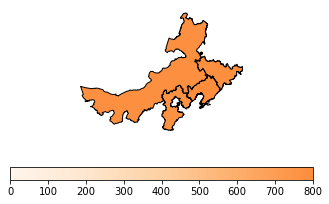

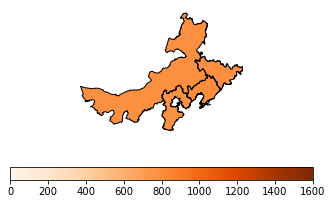

In [71]:
china = gpd.read_file('china-shapefiles/china.shp',
                      encoding='utf-8')# read shapefile
#print(china)
china = china.dissolve(by='OWNER').reset_index(drop=False)#Since each row of data is a separate face, it is fused according to its provincial column owner
albers_proj = '+proj=aea +lat_1=25 +lat_2=47 +lon_0=105'#Projection

df_used = pd.read_excel('data_used.xlsx')  # read the province list
df_used_name = pd.DataFrame(df_used, columns=["ProvinceName1", "ProvinceName2", "ProvinceName3", "ProvinceName4"])
df_used_EnglishName = pd.DataFrame(df_used,
                                   columns=["ProvinceEnglishName1", "ProvinceEnglishName2", "ProvinceEnglishName3",
                                            "ProvinceEnglishName4"])
df_used_number = pd.DataFrame(df_used, columns=["Data1", "Data2", "Data3", "Data4"])#choose the data of each pair of figure
#print(china)

def getFigure_narrow(ax):
    
    data_with_geometry.to_crs(albers_proj).plot(ax=ax,#draw the map
                                                     column='number',
                                                     cmap=trunc_cmap,
                                                     edgecolor='black',
                                                     vmin=0,
                                                     # vmax=1000,
                                                     # legend=True,#
                                                     #legend_kwds={'orientation': "horizontal"}
                                                     )
    fig1.colorbar(mpl.cm.ScalarMappable(# draw the colorbar
        norm=mpl.colors.Normalize(vmin=0, vmax=data_with_geometry['number'].max()),#set the colour and the number
        cmap=trunc_cmap),
        cax=axColorBar_trunc,
        orientation='horizontal',
    )

    ax.plot()
    ax.axis('off')
    figure_name=str(i+1)+"_narrow.png"# set figure name 
    fig1.savefig(figure_name, dpi=500)


def getFigure_full(ax):
    data_with_geometry.to_crs(albers_proj).plot(ax=ax,
                                                     column='number',
                                                     cmap=trunc_cmap,
                                                     edgecolor='black',
                                                     vmin=0,
                                                     )

    fig2.colorbar(mpl.cm.ScalarMappable(
    norm=mpl.colors.Normalize(vmin=0, vmax=data_with_geometry['number'].max()*2),
    cmap=full_cmap),
    cax=axColorBar_full,
    orientation='horizontal',
    )
    ax.plot()
    ax.axis('off')
    figure_name=str(i+1)+"_full.png"# set figure name 
    fig2.savefig(figure_name, dpi=500)

fig1 = plt.figure(figsize=(6, 6))# plot 2 figures each time
fig2 = plt.figure(figsize=(6, 6))


for i in range(42):
    fig1.clear()#Prevent picture overlap
    fig2.clear()
    axColorBar_trunc = fig1.add_axes([0.15, 0.4, 0.7, 0.03])#The location of the colourbar_trunc
    axMain_trunc = fig1.add_axes([0.1, 0.5, 0.8, 0.3])#The location of the map

    axColorBar_full = fig2.add_axes([0.15, 0.4, 0.7, 0.03])#The location of the colourbar_full
    axMain_full = fig2.add_axes([0.1, 0.5, 0.8, 0.3])# The location of the map


    df_now = pd.concat([pd.DataFrame(df_used_name.values[i]), pd.DataFrame(df_used_EnglishName.values[i]),
                        pd.DataFrame(df_used_number.values[i])], axis=1)# get the data of each loop
    df_now.columns = ['provinceName', 'provinceEnglishName', 'number']  # set the column
    data_with_geometry = pd.merge(left=df_now,
                                  right=china,
                                  left_on='provinceName',
                                  right_on='OWNER',
                                  how='left'
                                  ).loc[:, ['provinceName',
                                            'provinceEnglishName',
                                            'number',
                                            'geometry'
                                            ]]#connect the data with location
    data_with_geometry = gpd.GeoDataFrame(data_with_geometry, crs='EPSG:4326')# from DataFrame to GroDataFrame

    splits = 1000
    halfway = int(splits / 2+1)
    
    if(i%6==0): #Cycle through colors
        colour_values = mpl.cm.Reds(np.linspace(0, 1, splits))# list of rgb colours for full version. Returns num evenly spaced samples, calculated over the interval [start, stop]
    elif(i%6==1):
        colour_values = mpl.cm.Greys(np.linspace(0, 1, splits))
    elif(i%6==2):
        colour_values = mpl.cm.Purples(np.linspace(0, 1, splits))
    elif(i%6==3):
        colour_values = mpl.cm.Blues(np.linspace(0, 1, splits))
    elif(i%6==4):
        colour_values = mpl.cm.Greens(np.linspace(0, 1, splits))
    elif(i%6==5):
        colour_values = mpl.cm.Oranges(np.linspace(0, 1, splits))
        
    trunc_colours = colour_values[0:halfway, :]
    trunc_cmap = mpl.colors.ListedColormap(trunc_colours)
    full_colours = colour_values[:, :]
    full_cmap = mpl.colors.ListedColormap(full_colours)

    getFigure_narrow(axMain_trunc)
    getFigure_full(axMain_full)
    

In [62]:
fullsm = mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=1600), cmap=full_cmap)
truncsm = mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=800), cmap=trunc_cmap)
print(fullsm.to_rgba(800))
print(truncsm.to_rgba(800))

(0.9914186851211073, 0.550726643598616, 0.23277201076509035, 1.0)
(0.9914186851211073, 0.550726643598616, 0.23277201076509035, 1.0)
